# Using Logistic Regression to Predict Titanic Survivors

1. Pick Variables
2. Plot Histograms, Remove Outliers, See Correlation Matrix
3. Transform the variables into binary 'dummies'
4. Create traning & test sets
5. Use Logistic Regression
6. Asses Accuracy through the classification Report

In [1]:
# Libaries
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
# Load Data
df = pd.read_csv('titanic.csv')
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


Features:

Survived = whether or not the individual survived  
Pclass = 1st, 2nd, & 3rd class  
Name = name of the individual  
Sex = sex of the individual  
Age = age of the individual  
Siblings/Spouses Aboard = num of siblings/spouses in relation to the individual on board  
Parents/Children Aboard = num of parents/children in relation ot the individual on board  
Fare = cost of fare  

887 rows, 8 columns

## 1. Pick Variables

In [3]:
# Summary Statistics
# Outliers: Siblines/Spouses Aboard, Parents/Children Aboard, & Fare
# Independent Variables: 'Pclass', 'Sex', 'Age', 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'
# Dependent Variable: 'Survived'

df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


## 2. Plot Histograms, Remove Outliers, See Correlation Matrix

### Histograms

array([[<Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Siblings/Spouses Aboard'}>],
       [<Axes: title={'center': 'Parents/Children Aboard'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

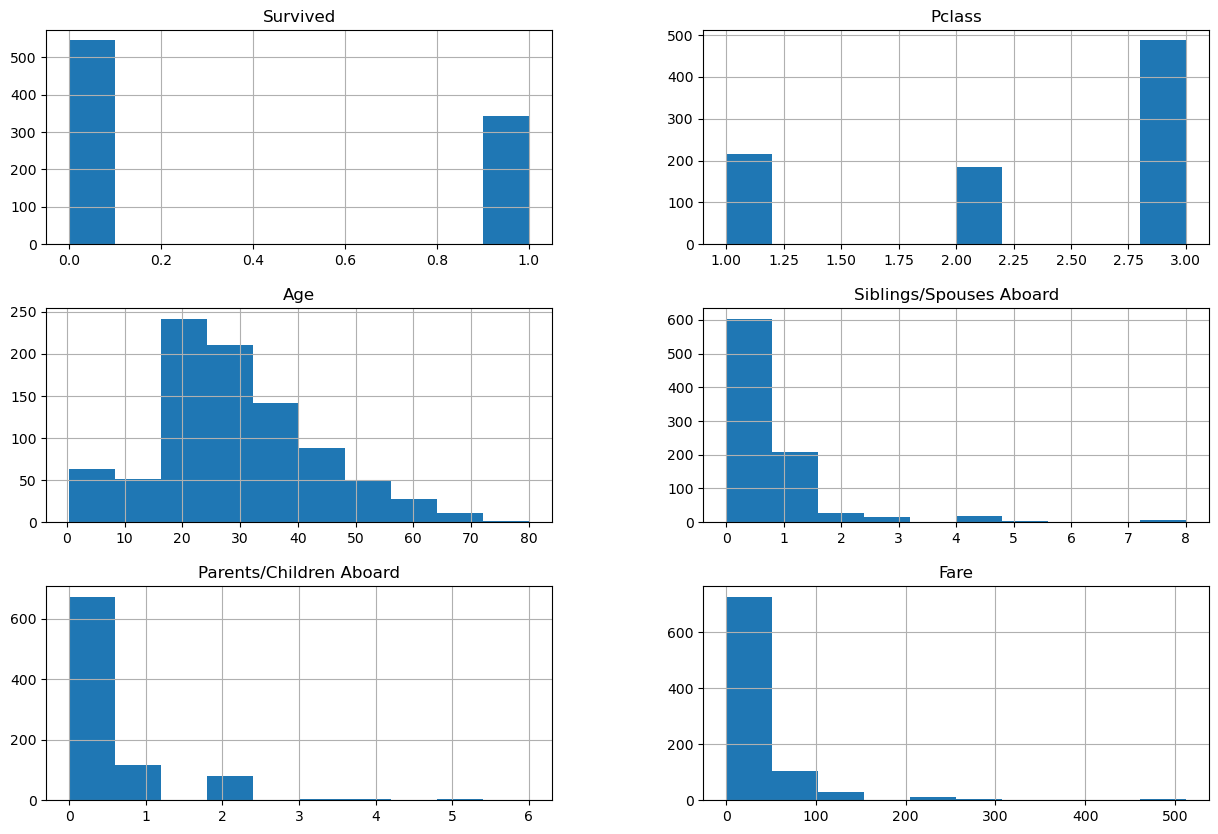

In [4]:
# Histograms
df.hist(figsize=(15,10))

### Removing Outliers

In [5]:
print(len(df))
df = df[df['Siblings/Spouses Aboard'] <= 3]
print(len(df))

887
857


In [6]:
print(len(df))
df = df[df['Parents/Children Aboard'] <= 3]
print(len(df))

857
847


In [7]:
print(len(df))
df = df[df['Fare'] <= 200]
print(len(df))

847
828


/var/folders/82/72_hwq6s7rj5gg_mx1pm5y500000gn/T/ipykernel_79727/618497236.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0, 0.5, 'Survived'),
  Text(0, 1.5, 'Pclass'),
  Text(0, 2.5, 'Age'),
  Text(0, 3.5, 'Siblings/Spouses Aboard'),
  Text(0, 4.5, 'Parents/Children Aboard'),
  Text(0, 5.5, 'Fare')])

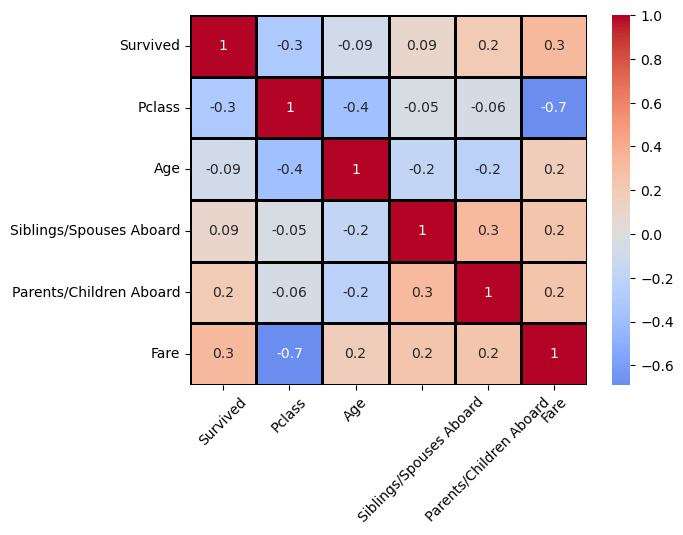

In [8]:
sns.heatmap(df.corr(),
            cmap = 'coolwarm',
            fmt = '.1g',
            center = 0,
            annot = True,
            linewidth = 1,
            linecolor = 'black')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)

## 3. Transform Categorical Variables Into Binary 'Dummies'

In [9]:
# df = df.drop(columns = ['Name'])
# df = pd.get_dummies(df, drop_first=True)
df['Sex'] = np.where(df['Sex'] == 'female', 1, 0)
df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,0,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,1,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,1,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,1,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,0,35.0,0,0,8.0500


## 4. Create X, y, Training & Test Sets

### X & y variables

In [10]:
X = df.drop(columns=['Survived', 'Name'])
X = sm.add_constant(X)
y = df.Survived

X.head(3)

,const,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,1.0,3,0,22.0,1,0,7.2500
1,1.0,1,1,38.0,1,0,71.2833
2,1.0,3,1,26.0,0,0,7.9250


### Training & Test Sets

In [11]:
# X_train = predicted X values
# X_test = actual X values
# y_train = predicted y values
# y_test = actual y values
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=1502)

## 5. Logistic Regression

In [12]:
# Not statistically significant: 'Siblings/Spouses Aboard', 'Parents/Children Aboard', 'Fare'

model = sm.Logit(y_train, X_train).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.445848
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  662
Model:                          Logit   Df Residuals:                      655
Method:                           MLE   Df Model:                            6
Date:                Tue, 08 Aug 2023   Pseudo R-squ.:                  0.3394
Time:                        15:39:42   Log-Likelihood:                -295.15
converged:                       True   LL-Null:                       -446.80
Covariance Type:            nonrobust   LLR p-value:                 1.609e-62
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       2.6152      0.649      4.029      0.000       1.343   

### Interpreting Results

In [13]:
def log_reader (coef):
    prob = round((np.exp(coef) - 1) * 100, 2)
    if prob > 0:
        print('Probability of surviving increases by ', prob, '%')
    elif prob == 0:
        print('No impact')
    else:
        print('Probability of surviving decreases by ', prob, '%')
        
log_reader(-1.1915)

Probability of surviving decreases by  -69.62 %


## 6. Assessing Accuracy

### Convert Probabilities into Events

In [14]:
# 0.5 maximizes accuracy
predictions = model.predict(X_test)
predictions = np.where(predictions > 0.5, 1, 0)
predictions[:5]

array([1, 0, 1, 0, 0])

### Checking Balance

In [15]:
# Checking the mean of actual y values
# 34/66 split (34% are 1's, 66% are 0's)
# This is near the limit of a balanced dataset, but we will accept it.
# Anything under 30% is an unbalanced dataset.
y_test.mean()

0.3373493975903614

### Confusion Matrix

In [16]:
print(confusion_matrix(y_test, predictions))
tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()

[[93 17]
 [15 41]]


### KPI's

In [17]:
# Accuracy:
# Use for Balanced Datasets - Interpretable
acc = (tp + tn) / (tp + tn + fp + fn)
print('Accuracy:', round(acc * 100, 1), "%")

# F-1 Score:
# Use for Unbalanced Datasets - Non-interpretable. Must be compared to other models
f1 = (2 * tp) / ((2 * tp) + fp + fn)
print('F-1 Score:', round(f1 * 100, 1), "%")

# Specificity: 
# Expected higher percentage do to slightly unbalanced dataset
spec = tn / (tn + fp)
print('Specificity:', round(spec * 100, 1), "%")

# Sensitivity:
sens = tp / (tp + fn)
print('Sensitivity:', round(sens * 100, 1), "%")

Accuracy: 80.7 %
F-1 Score: 71.9 %
Specificity: 84.5 %
Sensitivity: 73.2 %


In [18]:
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85       110
           1       0.71      0.73      0.72        56

    accuracy                           0.81       166
   macro avg       0.78      0.79      0.79       166
weighted avg       0.81      0.81      0.81       166

